
# Analysis of Stack Overflow annual developer survey

With nearly 80,000 responses fielded from over 180 countries and dependent 
territories, our Annual Developer Survey examines all aspects of the developer 
experience from career satisfaction and job search to education and opinions 
on open source software.

Source: [Stack Overflow Annual Developer Survey](http://bit.ly/SO-Survey-Download)







In [132]:
import pandas as pd

df= pd.read_csv('survey_results_public.csv', index_col='ResponseId')

df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [133]:
df.describe()

,CompTotal,ConvertedCompYearly
count,4.718300e+04,4.684400e+04
mean,2.119407e+69,1.184262e+05
std,4.603702e+71,5.272944e+05
min,0.000000e+00,1.000000e+00
25%,1.600000e+04,2.702500e+04
50%,6.700000e+04,5.621100e+04
75%,1.400000e+05,1.000000e+05
max,1.000000e+74,4.524131e+07




**1. Let's answer a simple question: how many developers are developers by profession and how many developers are students.**



In [155]:
dev_status= df['MainBranch'].value_counts()

dev_status

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64

In [135]:
df['MainBranch'].value_counts(normalize=True)

I am a developer by profession                                                   0.696952
I am a student who is learning to code                                           0.144165
I am not primarily a developer, but I write code sometimes as part of my work    0.078836
I code primarily as a hobby                                                      0.059073
I used to be a developer by profession, but no longer am                         0.014825
None of these                                                                    0.006148
Name: MainBranch, dtype: float64

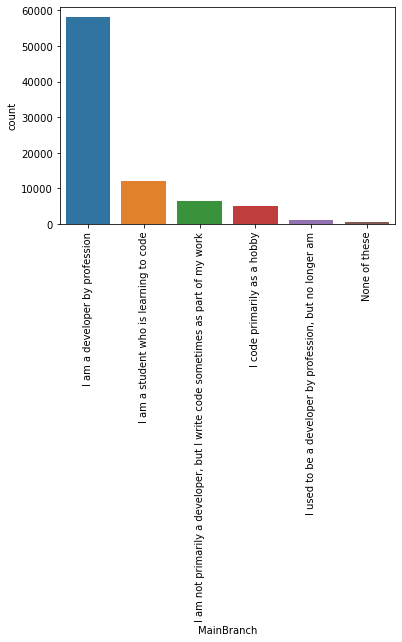

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='MainBranch', data=df)

plt.xticks(rotation=90)

plt.show()

**2. It would also be interesting to know which is the most common age when the respondents started to code. The method value.counts() proves itself useful also in this case.**

In [136]:
df['Age1stCode'].value_counts()

11 - 17 years           44170
18 - 24 years           20065
5 - 10 years            11720
25 - 34 years            4199
35 - 44 years            1312
Younger than 5 years      905
45 - 54 years             544
55 - 64 years             245
Older than 64 years        83
Name: Age1stCode, dtype: int64

In [137]:
df['Age1stCode'].value_counts(normalize=True)

11 - 17 years           0.530615
18 - 24 years           0.241041
5 - 10 years            0.140793
25 - 34 years           0.050443
35 - 44 years           0.015761
Younger than 5 years    0.010872
45 - 54 years           0.006535
55 - 64 years           0.002943
Older than 64 years     0.000997
Name: Age1stCode, dtype: float64

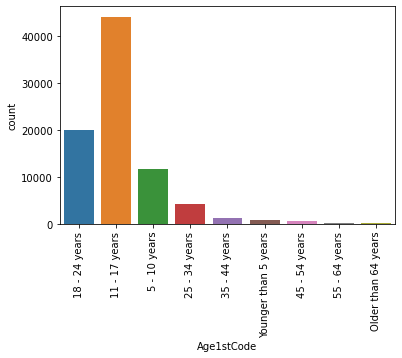

In [165]:
sns.countplot(x='Age1stCode', data=df)

plt.xticks(rotation=90)

plt.show()

**3. What if we wanted to know which is the most common age the respondents started coding in each country?**

In [138]:
grpby_country= df.groupby('Country')


In [139]:
# Most common starting age in each country

Age1stCode_country= grpby_country['Age1stCode'].value_counts()

Age1stCode_country


Country      Age1stCode          
Afghanistan  18 - 24 years           19
             Younger than 5 years    13
             11 - 17 years           12
             5 - 10 years             7
             25 - 34 years            4
                                     ..
Zimbabwe     11 - 17 years            9
             25 - 34 years            5
             5 - 10 years             2
             35 - 44 years            1
             Older than 64 years      1
Name: Age1stCode, Length: 992, dtype: int64

In [140]:
# Most common starting age in China

Age1stCode_China = Age1stCode_country.loc['China']

Age1stCode_China

Age1stCode
18 - 24 years           374
11 - 17 years           252
5 - 10 years            177
Younger than 5 years    110
25 - 34 years            85
35 - 44 years            19
45 - 54 years             7
55 - 64 years             3
Older than 64 years       1
Name: Age1stCode, dtype: int64

In [143]:
# Most common starting age per country

def get_top_values(x):
    return x.value_counts().index[0]

MostCommonAge1stCode_country= grpby_country['Age1stCode'].agg(get_top_values)

MostCommonAge1stCode_country





Country
Afghanistan                             18 - 24 years
Albania                                 11 - 17 years
Algeria                                 18 - 24 years
Andorra                                 11 - 17 years
Angola                                  18 - 24 years
                                            ...      
Venezuela, Bolivarian Republic of...    11 - 17 years
Viet Nam                                11 - 17 years
Yemen                                   18 - 24 years
Zambia                                  11 - 17 years
Zimbabwe                                18 - 24 years
Name: Age1stCode, Length: 181, dtype: object

**4. Now that we know the most common starting age in each country, it would be interesting to know which is the most common starting age across all countries.**

<AxesSubplot:xlabel='Age1stCode', ylabel='count'>

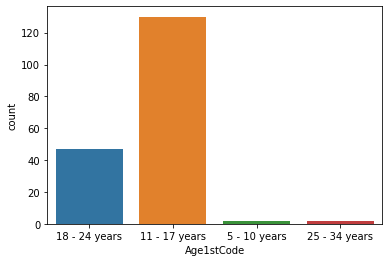

In [175]:
# We can find this out by plotting our previous results

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= MostCommonAge1stCode_country, data=df )


**5. How is education level related to the success of a developer? Does a higher education mean higher chances of being employed?**

In [176]:
df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


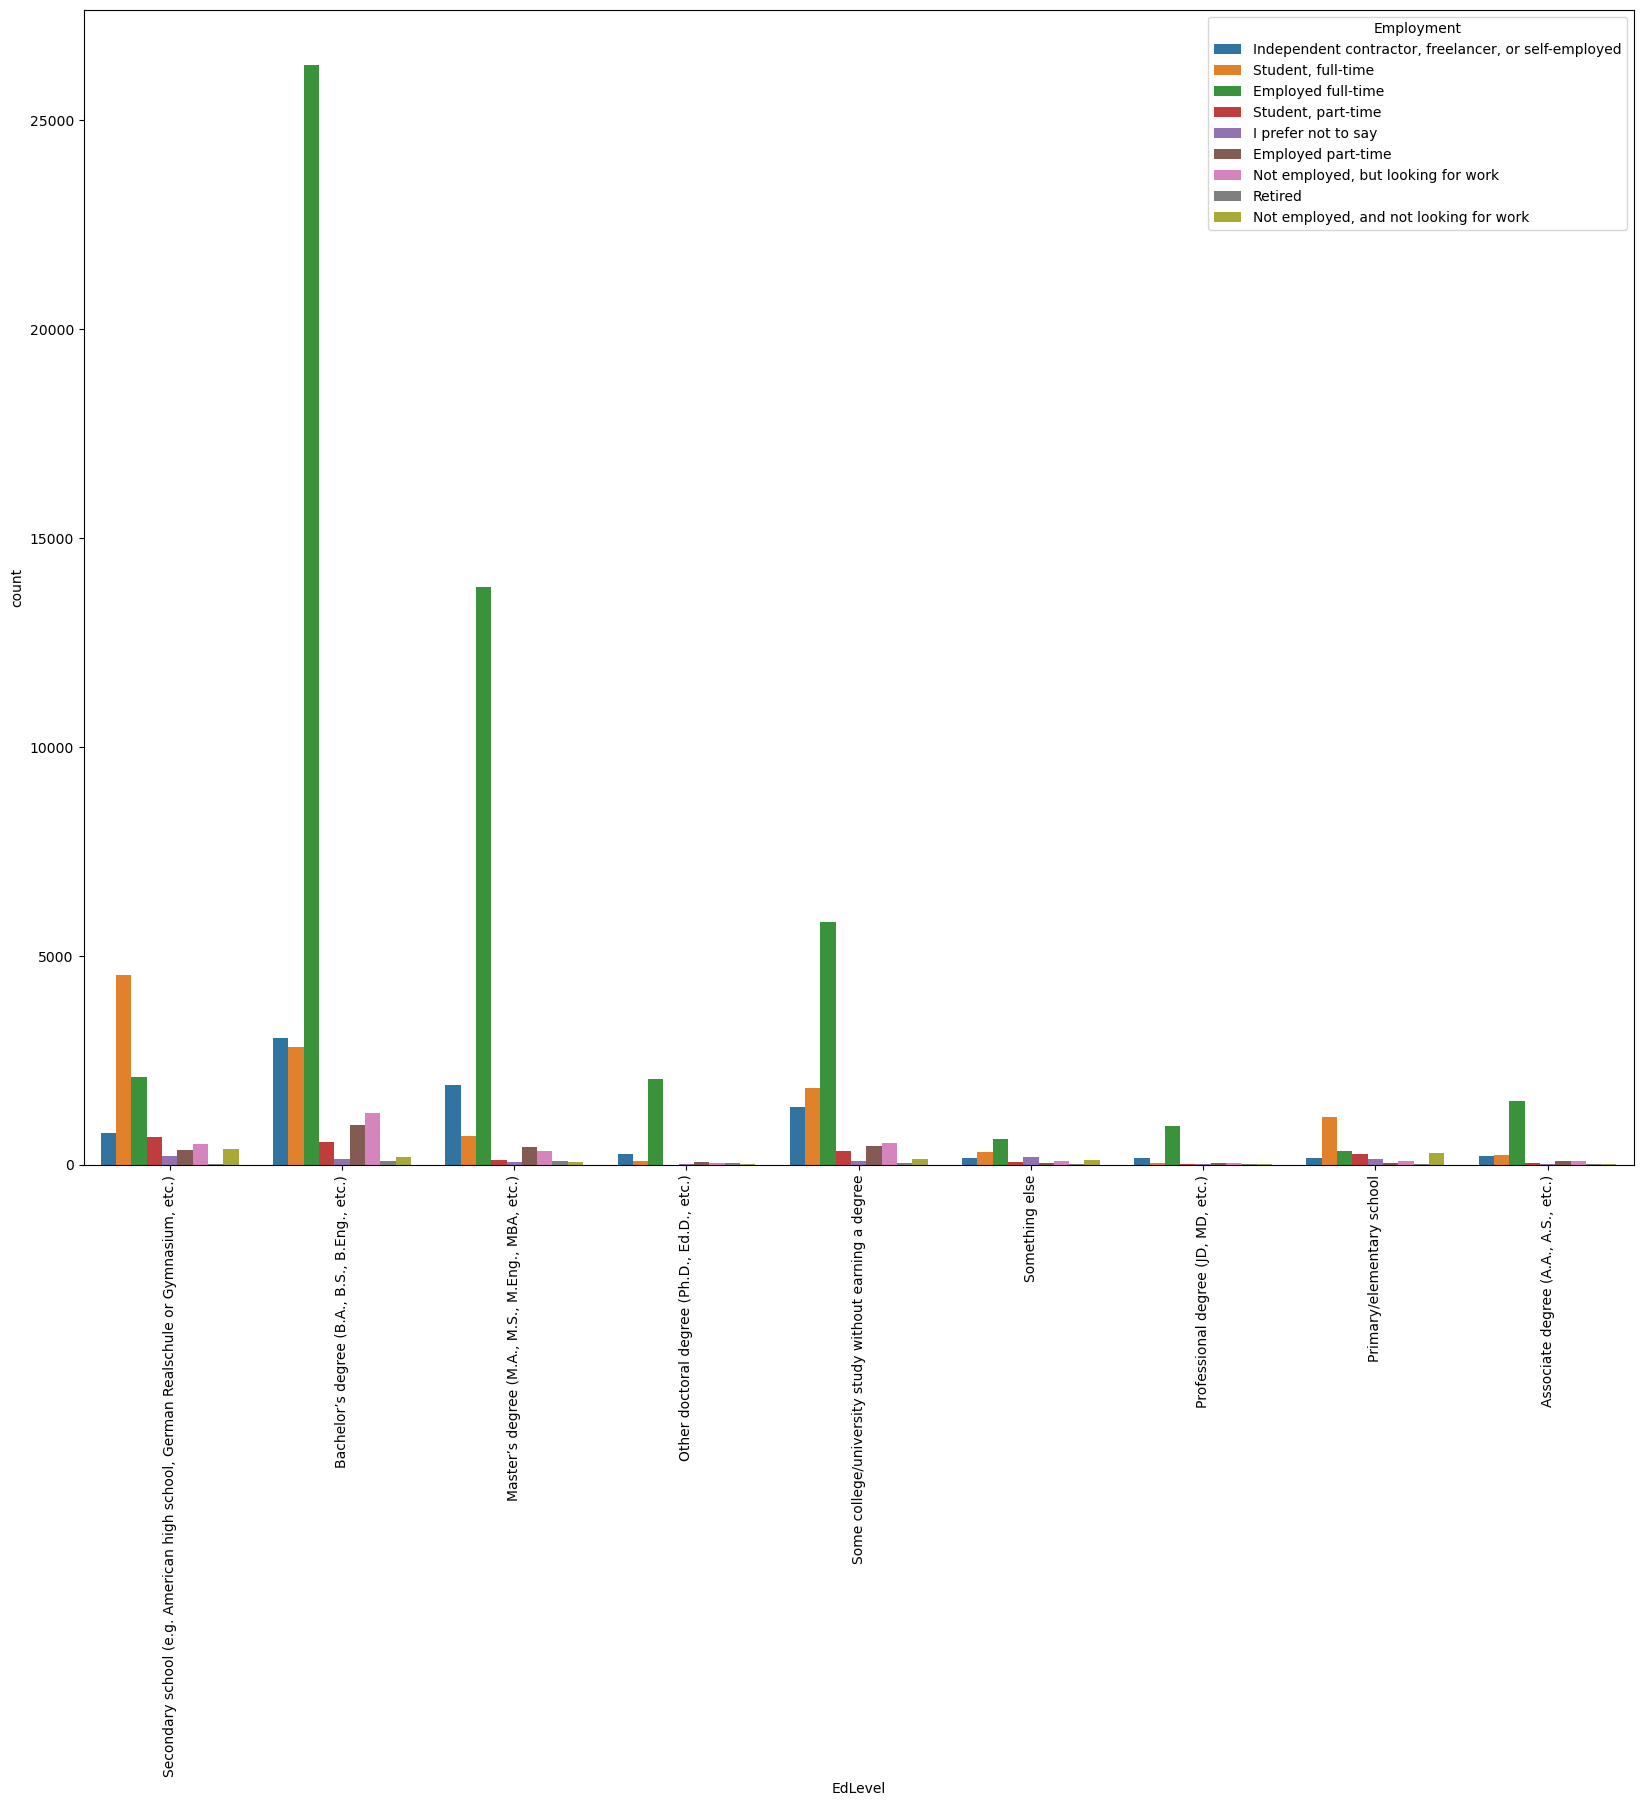

In [302]:

plt.figure(figsize=(20,15))

sns.countplot(x='EdLevel',
              data=df,
              hue='Employment'
              )
plt.xticks(rotation=90)

plt.show()


**6. The previous plot shows that there seems to be a correlation between the education level and higher chances of being employed: the majority of developers who have a bachelor's or master's degree are employed full time. However, it would also be interesting to know how did the respondents learn to code and how did this affect their chances of employment.In order to this we should compare the columns LearnCode and Employment.**

In [252]:
df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,online,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,online,7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,online,NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [251]:
df['LearnCode'] = df['LearnCode'].str.lower()

df['LearnCode'].unique()


array(['online', nan, 'friend or family member', 'school',
       'coding bootcamp', 'other (please specify):', 'colleague',
       'other (please specify):;colleague',
       'other (please specify):;books / physical media',
       'books / physical media', 'colleague;books / physical media',
       'other (please specify):;colleague;books / physical media'],
      dtype=object)

In [253]:
# We'll start by converting all the strings of column LearnCode to lower case 
# and then remapping them through some filtering  setting some filtering

df['LearnCode'] = df['LearnCode'].str.lower()

filt = df['LearnCode'].str.contains('online', na=False)

df.loc[filt, 'LearnCode'] = 'online'

df.loc[filt, 'LearnCode']
                                                            
                                                            

ResponseId
1        online
2        online
3        online
6        online
7        online
          ...  
83432    online
83434    online
83435    online
83436    online
83438    online
Name: LearnCode, Length: 54716, dtype: object

In [241]:
filt2 = df['LearnCode'].str.contains('school', na=False)

df.loc[filt2, 'LearnCode'] = 'school'

df.loc[filt2, 'LearnCode']

ResponseId
8        school
10       school
14       school
15       school
17       school
          ...  
83424    school
83429    school
83433    school
83437    school
83439    school
Name: LearnCode, Length: 18870, dtype: object

In [218]:
filt3 = df['LearnCode'].str.contains('coding bootcamp', na=False)

df.loc[filt3, 'LearnCode'] = 'coding bootcamp'

df.loc[filt3, 'LearnCode']

ResponseId
9        coding bootcamp
28       coding bootcamp
46       coding bootcamp
159      coding bootcamp
221      coding bootcamp
              ...       
82922    coding bootcamp
82967    coding bootcamp
83082    coding bootcamp
83086    coding bootcamp
83258    coding bootcamp
Name: LearnCode, Length: 776, dtype: object

In [220]:
filt4 = df['LearnCode'].str.contains('friend or family member', na=False)

df.loc[filt4, 'LearnCode'] = 'friend or family member'

df.loc[filt4, 'LearnCode']

ResponseId
5        friend or family member
65       friend or family member
78       friend or family member
119      friend or family member
130      friend or family member
                  ...           
83249    friend or family member
83272    friend or family member
83287    friend or family member
83358    friend or family member
83396    friend or family member
Name: LearnCode, Length: 2045, dtype: object

In [221]:
df['LearnCode'].unique()

array(['online', nan, 'friend or family member', 'school',
       'coding bootcamp', 'other (please specify):', 'colleague',
       'other (please specify):;colleague',
       'other (please specify):;books / physical media',
       'books / physical media', 'colleague;books / physical media',
       'other (please specify):;colleague;books / physical media'],
      dtype=object)

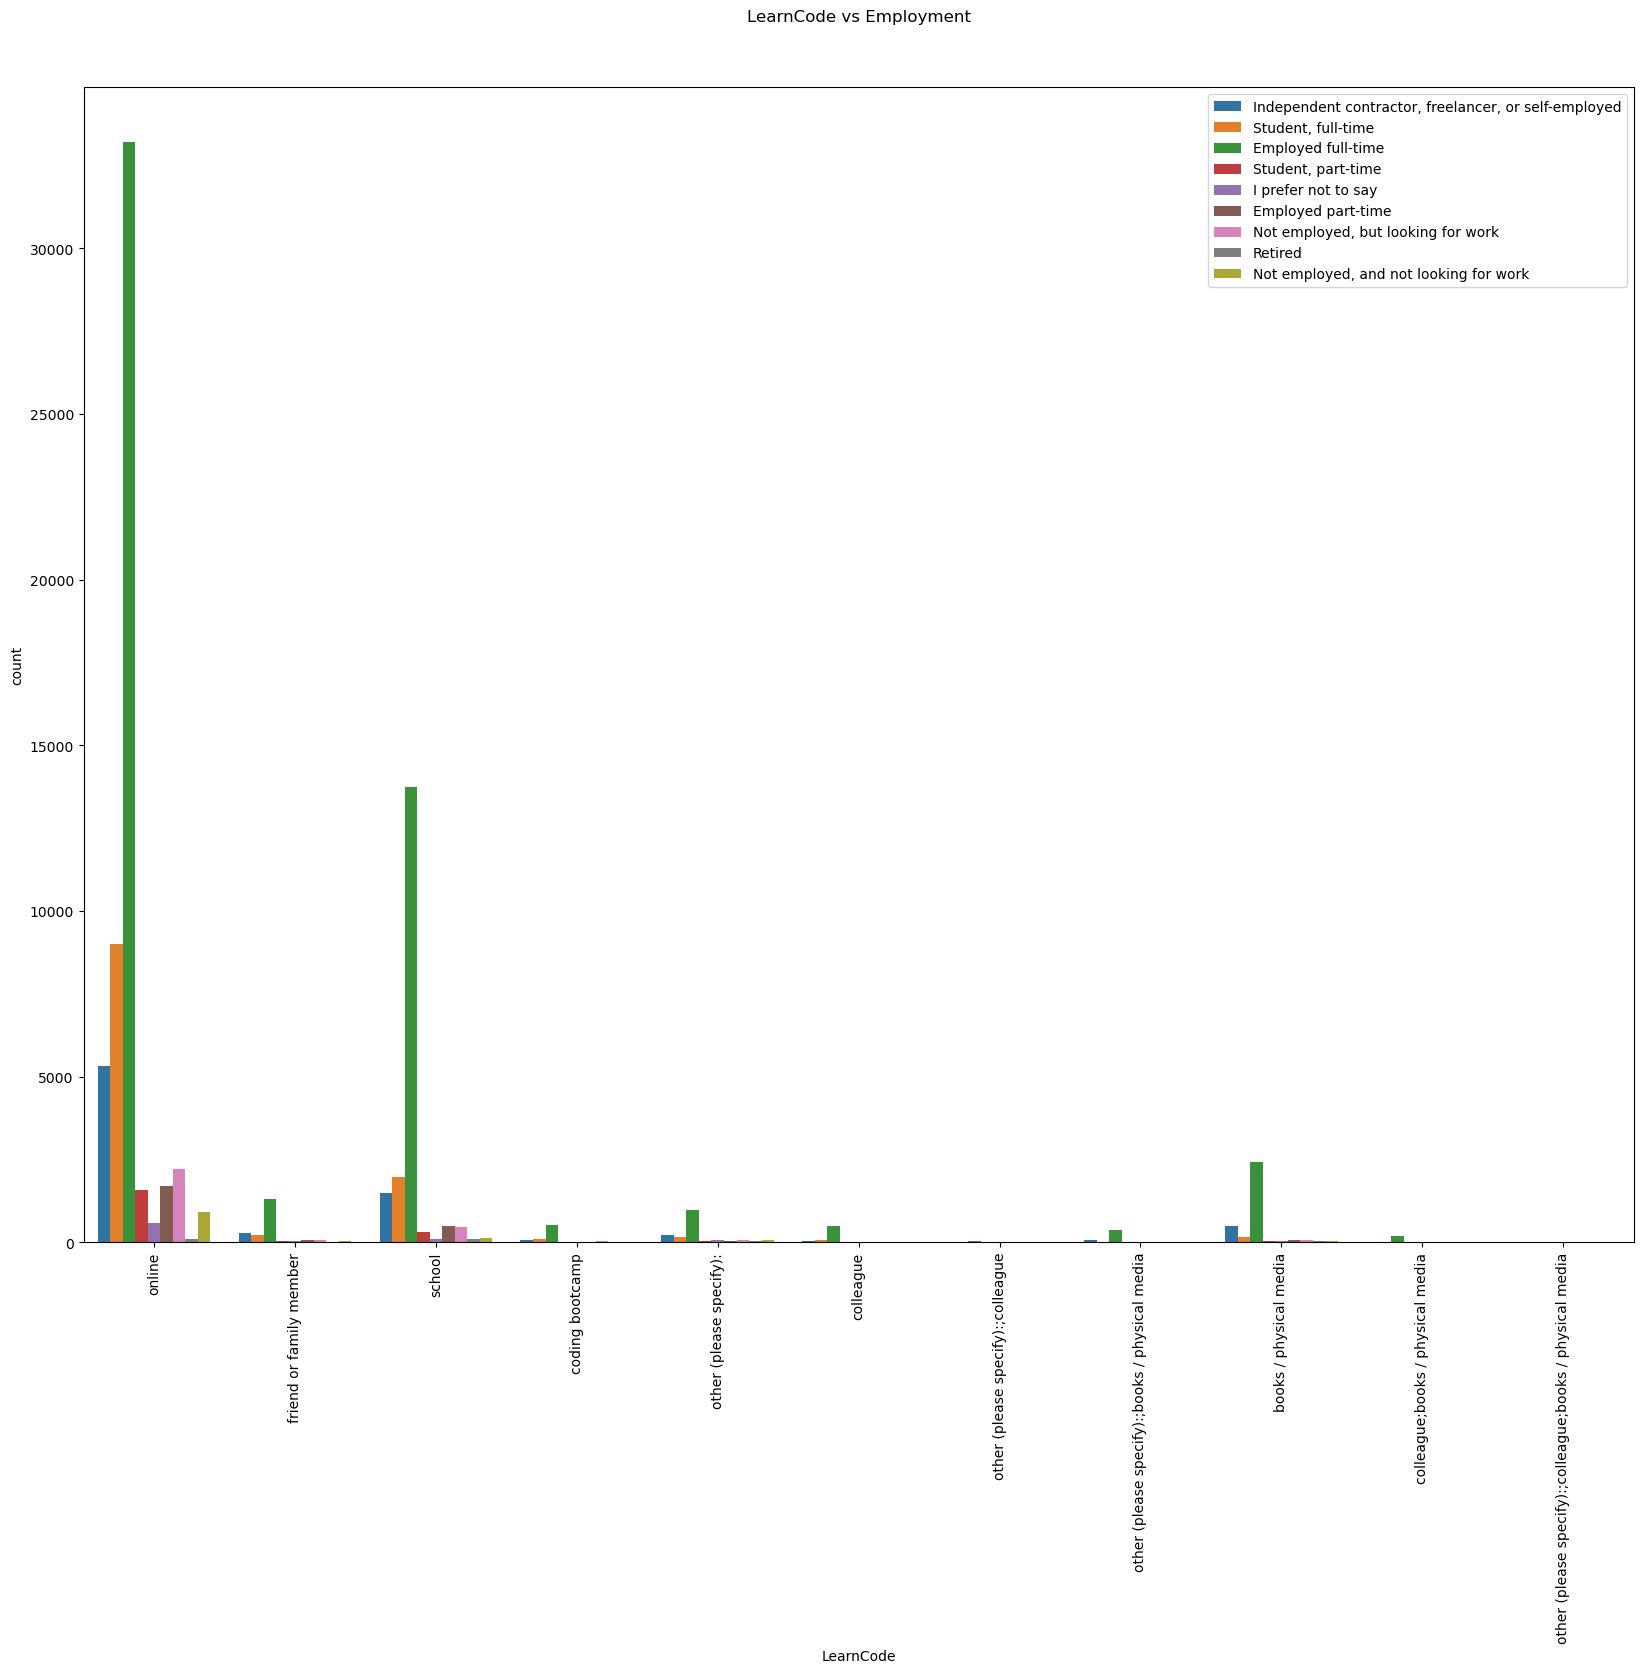

In [303]:


plt.figure(figsize=(20,15))



g = sns.countplot(x='LearnCode',
              data=df,
              hue='Employment' 
              )


g.set_title('LearnCode vs Employment', y=1.05)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.show()




In [296]:
sns.color_palette()

[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]